# Visual Transfomer
ViT test code \
https://huggingface.co/docs/transformers/model_doc/vit

In [1]:
!nvidia-smi

Sat Feb 10 07:13:37 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.147.05   Driver Version: 525.147.05   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA T600 Lap...  Off  | 00000000:01:00.0 Off |                  N/A |
| N/A   48C    P0     8W /  35W |      9MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## classify
dataset : https://www.kaggle.com/jessicali9530/stanford-dogs-dataset

cuda


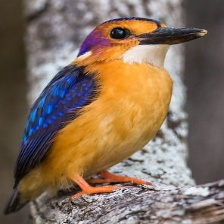

In [7]:
import os
from PIL import Image
import requests
import matplotlib.pyplot as plt
import torch
print("cuda" if torch.cuda.is_available() else "cpu")

#file_path = '/workspace/data/test_data/cher_1.jpg'
file_path = '/workspace/data/bird_dataset/test/PYGMY KINGFISHER/2.jpg'
image = Image.open(file_path)
image

## CPU process

In [8]:
import torch
from transformers import ViTForImageClassification, AutoImageProcessor
import time

#CPUで実行
device = "cpu"
print(device)


# モデルと特徴抽出器をロード（SSLエラーの場合　プロキシと証明書を用意）
model_id = 'google/vit-base-patch16-224'
image_processor =  AutoImageProcessor.from_pretrained(model_id)
model = ViTForImageClassification.from_pretrained(model_id).to(device)

start = time.time()
# 画像をテンソルに変換
inputs = image_processor(images=image, return_tensors='pt').to(device)

# 推論
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits # 1000クラスのスコアの配列
    predicted_idx = logits.argmax(-1).item() # スコアが最大のインデックスを取り分類判定
    print('class:', model.config.id2label[predicted_idx]) # インデックスをラベルに変換


fps = 1/(time.time() - start)
print("FPS:", fps)

cpu
class: jacamar
FPS: 9.552221402348483


## GPU process

In [5]:
import torch
from transformers import ViTForImageClassification, AutoImageProcessor
import time

# デバイスの設定
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

#モデルのロード
model_id = 'google/vit-base-patch16-224'
image_processor_gpu = AutoImageProcessor.from_pretrained(model_id)
model_gpu = ViTForImageClassification.from_pretrained(model_id).to(device)

start = time.time()
# 画像をテンソルに変換、GPUに移動
inputs_gpu = image_processor_gpu(images=image, return_tensors='pt').to(device)


# 推論
with torch.no_grad():
    outputs_gpu = model_gpu(**inputs_gpu)
    logits_gpu = outputs_gpu.logits # 1000クラスのベクトル配列
    predicted_idx_gpu = logits_gpu.argmax(-1).item() # スコアが最大のインデックスを取り分類判定
    print('class:', model_gpu.config.id2label[predicted_idx_gpu]) # インデックスをラベルに変換

fps = 1/(time.time() - start)
print("FPS:", fps)

cuda


RuntimeError: CUDA error: unspecified launch failure
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.
